## <center>        **Introduction to Data Science (S2-22_DSECLZG532)-ASSIGNMENT**</center>

## Group No 
IDS Group 24

## Group Member Names:
1. RAVANAN D - 2023da04031
2. Manikandan D - 2023da04041
3. CHANDRAKANTH SOWMITHRI D - 2023da04081
4.

# 1. Business Understanding

Students are expected to identify an analytical problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.

   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

# 2. Data Acquisition

For the problem identified , find an appropriate data set (Your data set must
be unique with minimum **20 features and 10k rows**) from any public data source.

---



## 2.1 Download the data directly



In [2]:
##---------Type the code below this line------------------##
import requests

def download_file(url, save_path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, 'wb') as f:
            f.write(response.content)
        print("File downloaded successfully.")
    else:
        print("Failed to download file.")

# Source- "https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data/download?datasetVersionNumber=11"
url = "https://raw.githubusercontent.com/manidhayal/bits-2023-IDS/main/Wellbeing_and_lifestyle_data_Kaggle.csv"
save_path = "lifestyle_and_wellbeing_data.csv"

download_file(url, save_path)


File downloaded successfully.


## 2.2 Code for converting the above downloaded data into a dataframe

In [3]:
##---------Type the code below this line------------------##
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv(save_path)

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [43]:
##---------Type the code below this line------------------##
# Display the first 5 records
print("First 5 records:")
print(df.head())

# Display the last 5 records
print("\nLast 5 records:")
print(df.tail())

First 5 records:
  Timestamp  FRUITS_VEGGIES DAILY_STRESS  PLACES_VISITED  CORE_CIRCLE  \
0    7/7/15               3            2               2            5   
1    7/7/15               2            3               4            3   
2    7/7/15               2            3               3            4   
3    7/7/15               3            3              10            3   
4    7/7/15               5            1               3            3   

   SUPPORTING_OTHERS  SOCIAL_NETWORK  ACHIEVEMENT  DONATION  BMI_RANGE  ...  \
0                  0               5            2         0          1  ...   
1                  8              10            5         2          2  ...   
2                  4              10            3         2          2  ...   
3                 10               7            2         5          2  ...   
4                 10               4            2         4          2  ...   

   SLEEP_HOURS  LOST_VACATION  DAILY_SHOUTING  SUFFICIENT_INCOME  \
0

## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [44]:
##---------Type the code below this line------------------##
# Display column headings
print("Column Headings:")
print(df.columns)

# Display statistical information
print("\nStatistical Information:")
print(df.describe())

# Display description
print("\nDescription:")
print(df.info())

# Display statistical summary
print("\nStatistical Summary:")
print(df.describe(include='all'))

Column Headings:
Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

Statistical Information:
       FRUITS_VEGGIES  PLACES_VISITED   CORE_CIRCLE  SUPPORTING_OTHERS  \
count    15972.000000    15972.000000  15972.000000       15972.000000   
mean         2.922677        5.232970      5.508077           5.616454   
std          1.442694        3.311912      2.840334           3.242021   
min          0.000000        0.000000      0.000000           0.000000   
25%          2.000000        2.000000      3.000000           3.000000   
50%          3.000000        5.000000      5.000000       

## 2.5 Write your observations from the above.
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

# 3. Data Preparation

## 3.1 Check for

* duplicate data
* missing data
* data inconsistencies


In [45]:
##---------Type the code below this line------------------##
# Check for duplicate data
print("Checking for duplicate rows...")
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Found {duplicate_rows} duplicate rows.")
else:
    print("No duplicate rows found.")

# Check for missing data
print("\nChecking for missing data...")
missing_data = df.isnull().sum().sum()
if missing_data > 0:
    print(f"Found {missing_data} missing values.")
else:
    print("No missing data found.")

# Check for data inconsistencies
print("\nChecking for data inconsistencies...")

# Check for unexpected values in the 'GENDER' column
expected_genders = ['Male', 'Female']
inconsistent_genders = df[~df['GENDER'].isin(expected_genders)]['GENDER'].unique()
if len(inconsistent_genders) > 0:
    print(f"Found inconsistent values in the 'GENDER' column: {inconsistent_genders}")
else:
    print("No data inconsistencies found in the 'GENDER' column.")

# Check for negative values in columns that should only have positive values
positive_columns = ['DAILY_STEPS', 'FRUITS_VEGGIES', 'PLACES_VISITED','CORE_CIRCLE','SUPPORTING_OTHERS','SOCIAL_NETWORK','ACHIEVEMENT','DONATION']
for column in positive_columns:
    negative_values = df[df[column] < 0][column].count()
    if negative_values > 0:
        print(f"Found {negative_values} negative values in the '{column}' column.")
    else:
        print(f"No negative values found in the '{column}' column.")

# Check for invalid age values
invalid_ages = df[df['AGE'].apply(lambda x: isinstance(x, (int, float)) and (x < 0 or x > 120))]['AGE'].unique()
if len(invalid_ages) > 0:
    print(f"Found invalid age values: {invalid_ages}")
else:
    print("No invalid age values found in the 'AGE' column.")

# Check for inconsistent date formats in the 'Timestamp' column
try:
    pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
    print("No inconsistencies found in the 'Timestamp' column date format.")
except ValueError:
    print("Inconsistent date format detected in the 'Timestamp' column.")

# Check for unexpected characters in text fields (example: 'DAILY_STRESS')
unexpected_characters = df[df['DAILY_STRESS'].str.contains(r'[^a-zA-Z0-9\s]', regex=True)]['DAILY_STRESS'].unique()
if len(unexpected_characters) > 0:
    print(f"Found unexpected characters in the 'DAILY_STRESS' column: {unexpected_characters}")
else:
    print("No unexpected characters found in the 'DAILY_STRESS' column.")

# Check for outliers in numerical columns (example: 'WORK_LIFE_BALANCE_SCORE')
q1 = df['WORK_LIFE_BALANCE_SCORE'].quantile(0.25)
q3 = df['WORK_LIFE_BALANCE_SCORE'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['WORK_LIFE_BALANCE_SCORE'] < lower_bound) | (df['WORK_LIFE_BALANCE_SCORE'] > upper_bound)]
if not outliers.empty:
    print(f"Outliers detected in the 'WORK_LIFE_BALANCE_SCORE' column.")
else:
    print("No outliers found in the 'WORK_LIFE_BALANCE_SCORE' column.")

Checking for duplicate rows...
Found 482 duplicate rows.

Checking for missing data...
No missing data found.

Checking for data inconsistencies...
No data inconsistencies found in the 'GENDER' column.
No negative values found in the 'DAILY_STEPS' column.
No negative values found in the 'FRUITS_VEGGIES' column.
No negative values found in the 'PLACES_VISITED' column.
No negative values found in the 'CORE_CIRCLE' column.
No negative values found in the 'SUPPORTING_OTHERS' column.
No negative values found in the 'SOCIAL_NETWORK' column.
No negative values found in the 'ACHIEVEMENT' column.
No negative values found in the 'DONATION' column.
No invalid age values found in the 'AGE' column.
Inconsistent date format detected in the 'Timestamp' column.
Found unexpected characters in the 'DAILY_STRESS' column: ['1/1/00']
Outliers detected in the 'WORK_LIFE_BALANCE_SCORE' column.


## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [4]:
##---------Type the code below this line------------------##
# Remove duplicate data
df = df.drop_duplicates()

# Impute or remove missing data
df = df.dropna()

# Remove data inconsistencies
df = df[df['DAILY_STRESS'] != '1/1/00']

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

# Remove outliers in 'WORK_LIFE_BALANCE_SCORE' column
q1 = df['WORK_LIFE_BALANCE_SCORE'].quantile(0.25)
q3 = df['WORK_LIFE_BALANCE_SCORE'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['WORK_LIFE_BALANCE_SCORE'] >= lower_bound) & (df['WORK_LIFE_BALANCE_SCORE'] <= upper_bound)]

# Reset the index
df = df.reset_index(drop=True)

print(df.shape)

(15422, 24)


## 3.3 Encode categorical data

In [47]:
##---------Type the code below this line------------------##

In [48]:
##---------Type the code below this line------------------##

## 3.4 Report

Mention and justify the method adopted
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

In [49]:
##---------Type the code below this line------------------##

observation = """
No Text Data
"""

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

In [5]:
##---------Type the code below this line------------------##

## Based on the business problem statement, the target variable(s) should be related to overall health outcomes. In your dataset, the WORK_LIFE_BALANCE_SCORE column seems like a suitable target variable as it likely reflects an individual's overall well-being, which is influenced by lifestyle factors such as diet, exercise, sleep, and mental well-being.

import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder

# Drop the 'Timestamp' column
df.drop(columns=['Timestamp'], inplace=True, errors='ignore')

# Define the target variable
target_column = 'WORK_LIFE_BALANCE_SCORE'

# Separate the features and the target variable
X = df.drop(target_column, axis=1)
# Discretize the target variable into bins
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform', subsample=200_000)
y = discretizer.fit_transform(df[[target_column]])

# Encode categorical features and fill missing values with the mode
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    X[column].fillna(X[column].mode()[0], inplace=True)
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le
    
# Display the shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

observations = """
In this example, we've divided the WORK_LIFE_BALANCE_SCORE into three bins: 0, 1 and 2

Report the Observations
Target Variable: The WORK_LIFE_BALANCE_SCORE was chosen as the target variable, as it likely reflects the overall well-being of individuals, which is influenced by various lifestyle factors.

Data Separation: The dataset was successfully separated into features (X) and the target variable (y), with the shapes of X and y being displayed to confirm the separation.

Discretization and Encoding: The target variable was discretized into three categories (Low, Medium, High) based on the score range. One-hot encoding was then applied to these categories to prepare the target variable for machine learning models that require numerical input.

By discretizing and encoding the target variable, we have transformed the continuous WORK_LIFE_BALANCE_SCORE into a categorical variable that can be used for classification tasks. This will allow us to identify public health trends and develop policies or programs to promote healthier lifestyle choices among the population. missing values.
"""

print(observations)

Shape of X (features): (15422, 22)
Shape of y (target): (15422, 1)

In this example, we've divided the WORK_LIFE_BALANCE_SCORE into three bins: 0, 1 and 2

Report the Observations
Target Variable: The WORK_LIFE_BALANCE_SCORE was chosen as the target variable, as it likely reflects the overall well-being of individuals, which is influenced by various lifestyle factors.

Data Separation: The dataset was successfully separated into features (X) and the target variable (y), with the shapes of X and y being displayed to confirm the separation.

Discretization and Encoding: The target variable was discretized into three categories (Low, Medium, High) based on the score range. One-hot encoding was then applied to these categories to prepare the target variable for machine learning models that require numerical input.

By discretizing and encoding the target variable, we have transformed the continuous WORK_LIFE_BALANCE_SCORE into a categorical variable that can be used for classification task

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

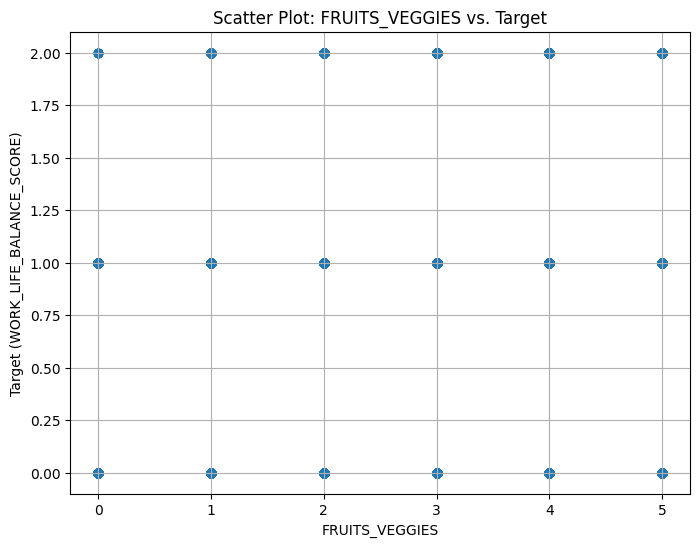

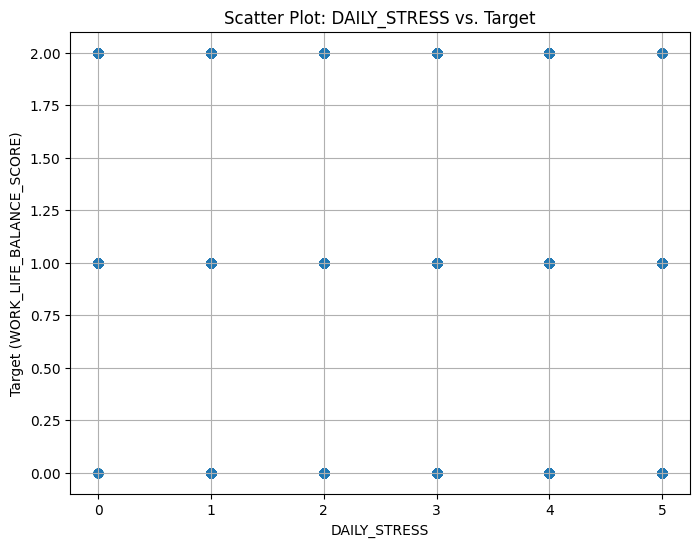

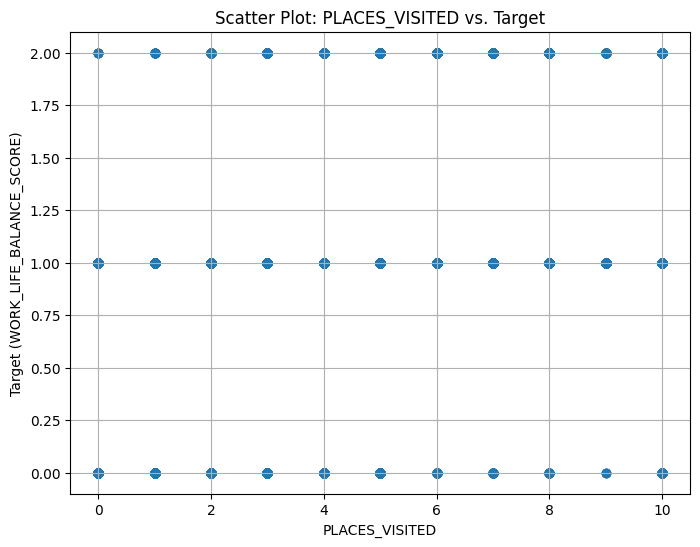

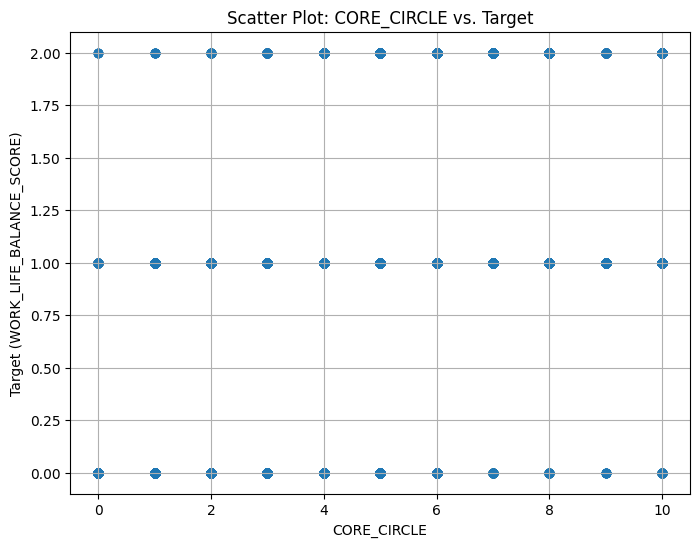

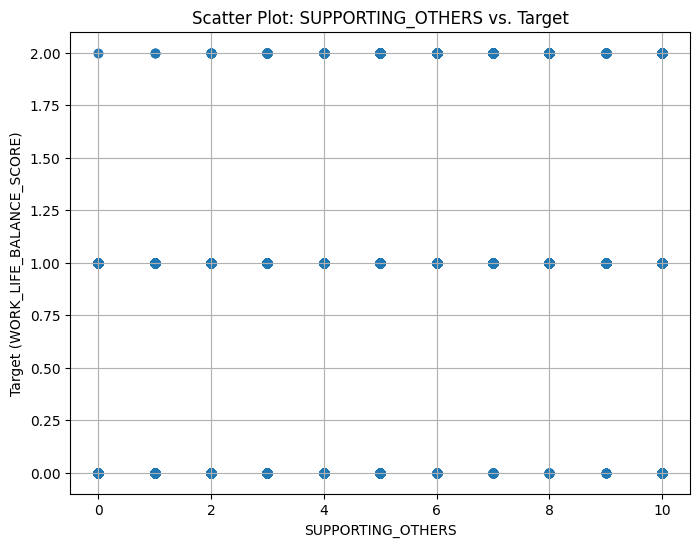

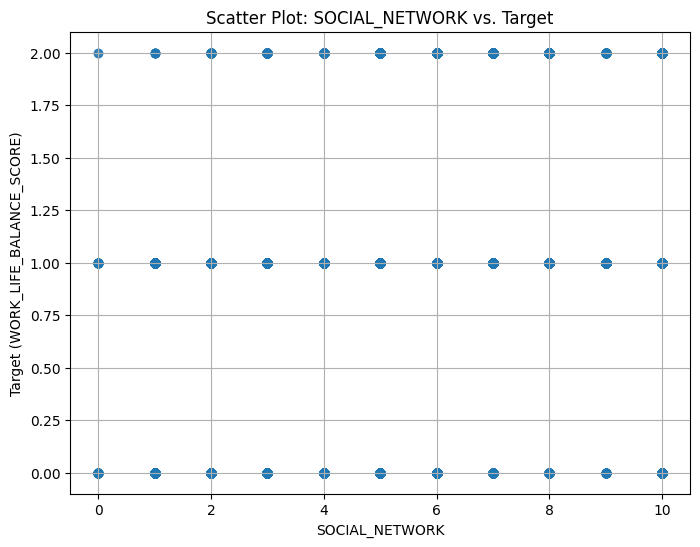

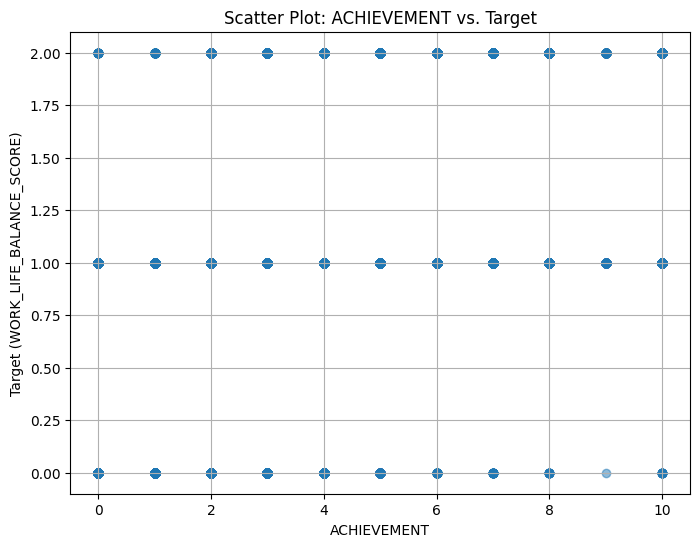

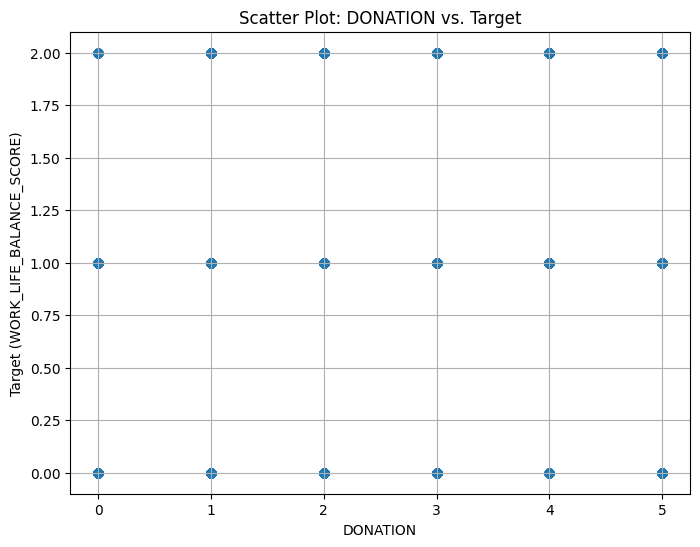

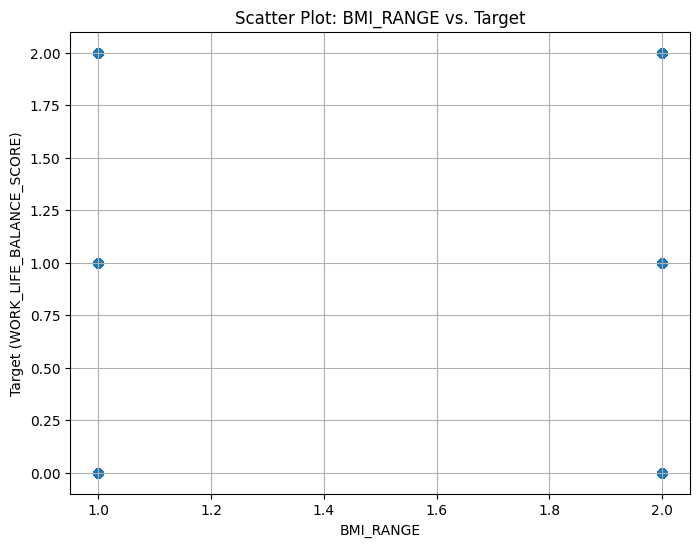

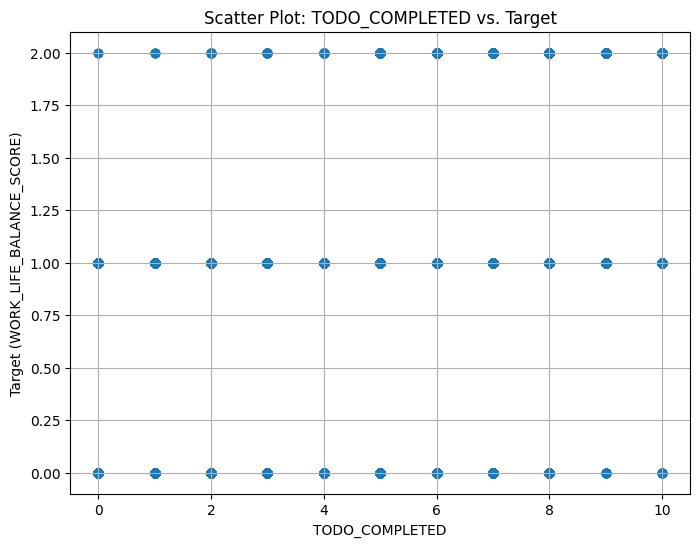

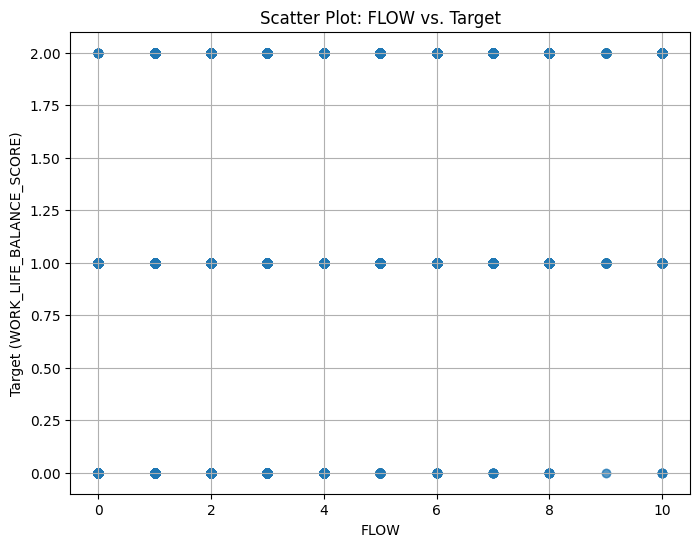

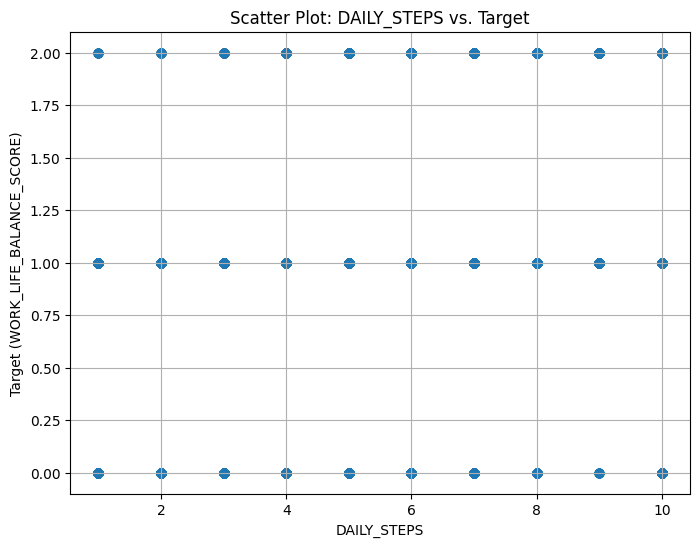

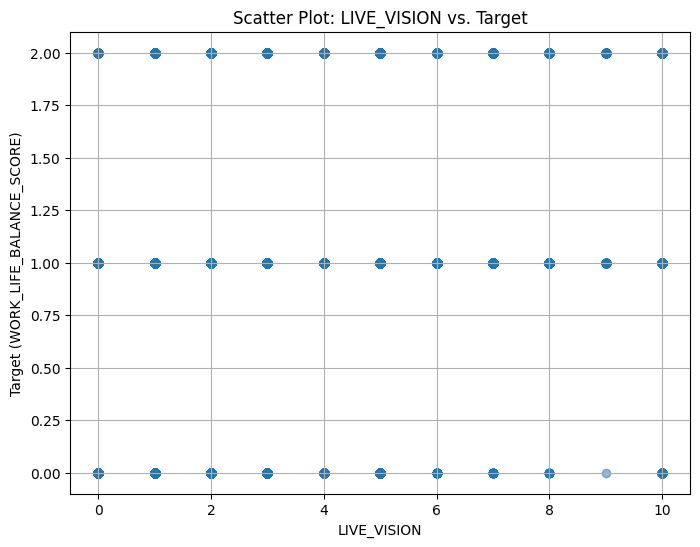

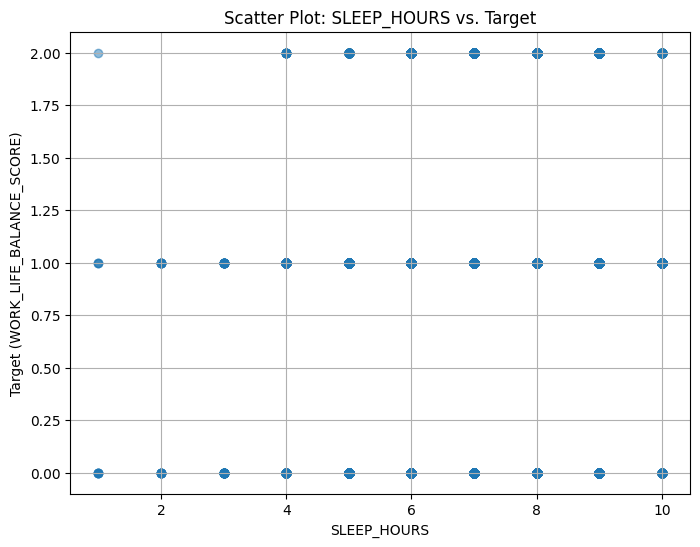

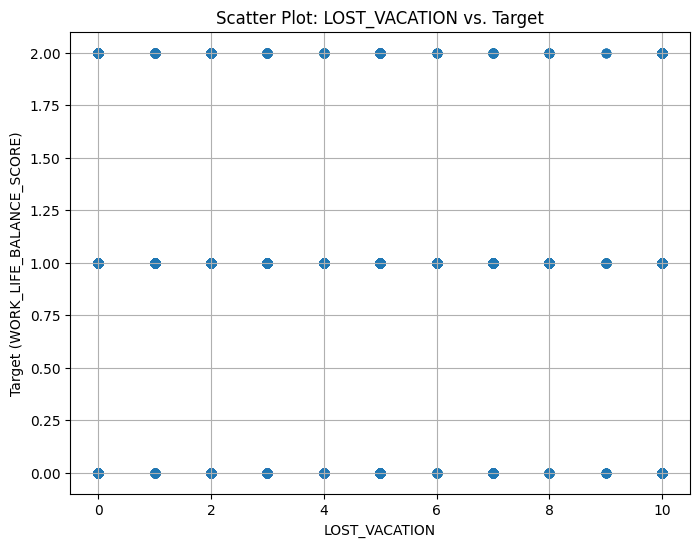

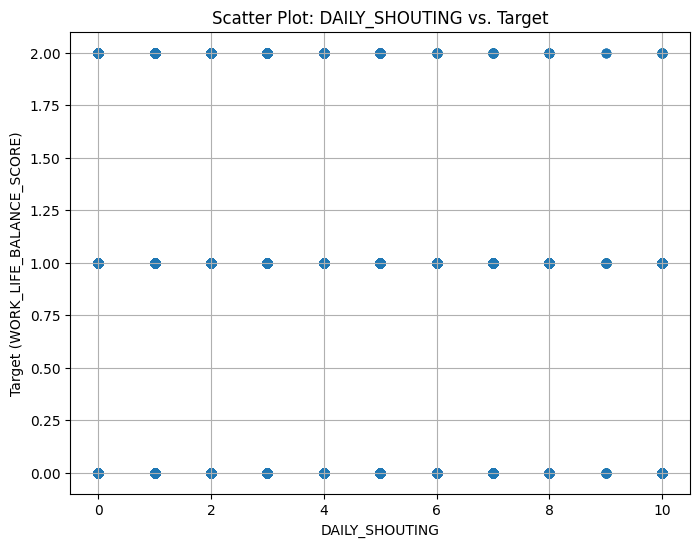

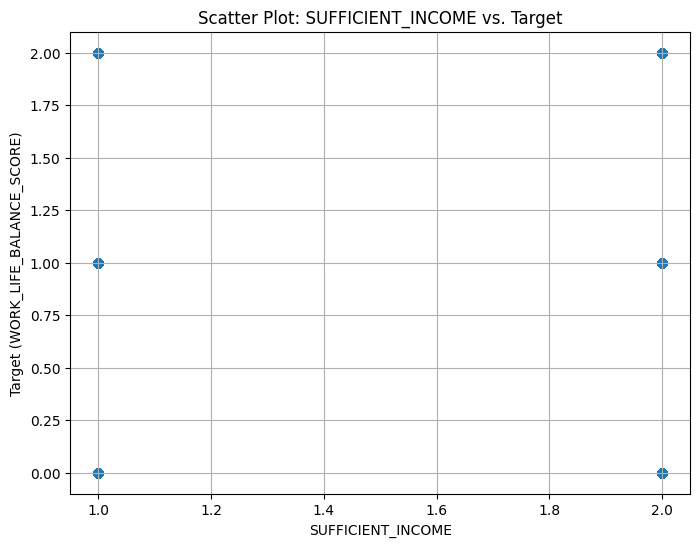

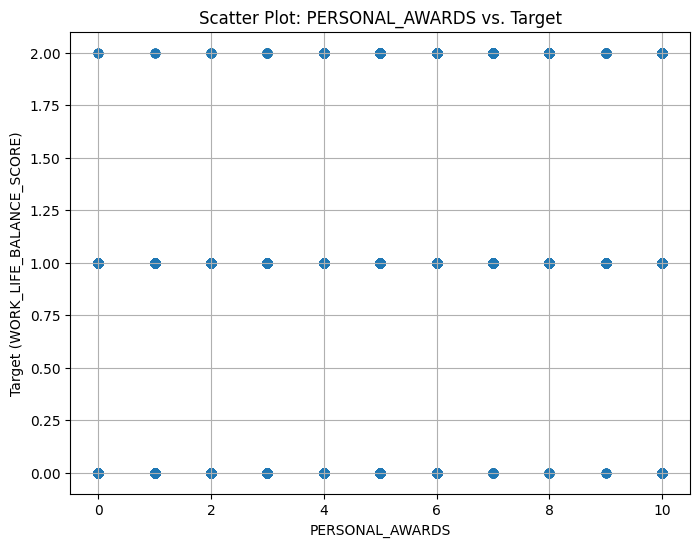

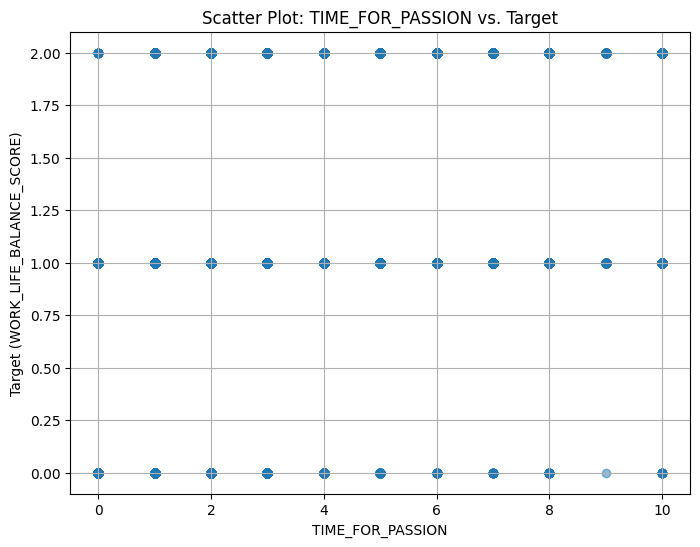

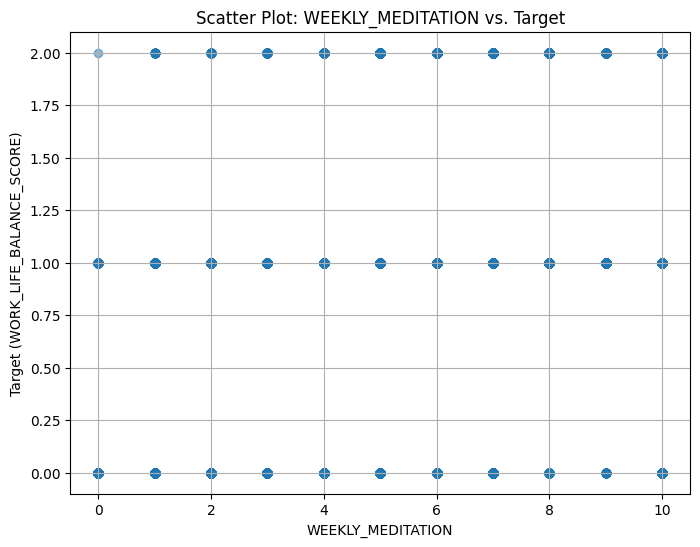

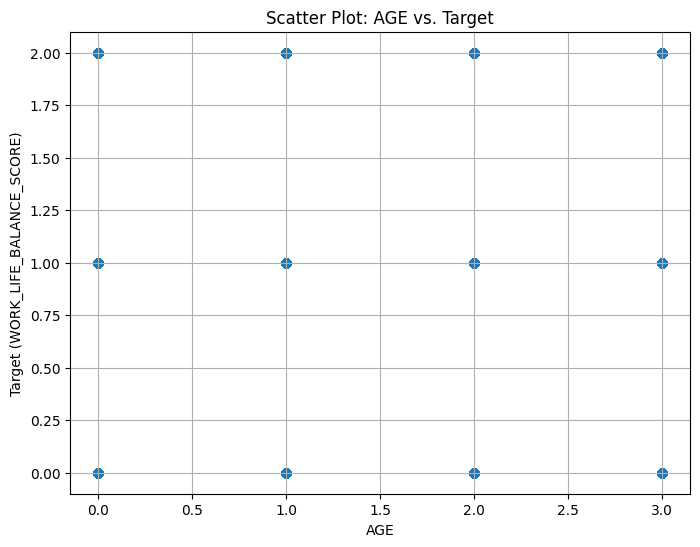

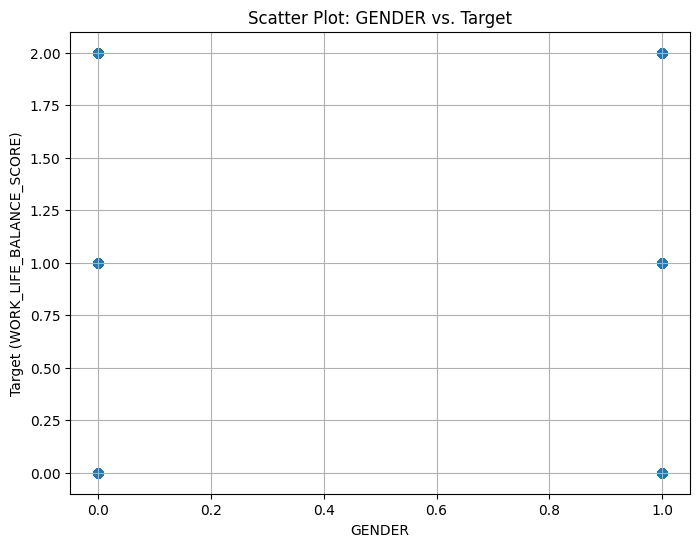

In [51]:
##---------Type the code below this line------------------##
import matplotlib.pyplot as plt

# Assuming 'X' is your features DataFrame and 'y' is your target variable

# List of quantitative attributes in the dataset
quantitative_attributes = X.select_dtypes(include=['int64', 'float64']).columns

# Plot scatter plots for each quantitative attribute with the target
for attribute in quantitative_attributes:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[attribute], y, alpha=0.5)
    plt.xlabel(attribute)
    plt.ylabel('Target (WORK_LIFE_BALANCE_SCORE)')
    plt.title(f'Scatter Plot: {attribute} vs. Target')
    plt.grid(True)
    plt.show()

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification.
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

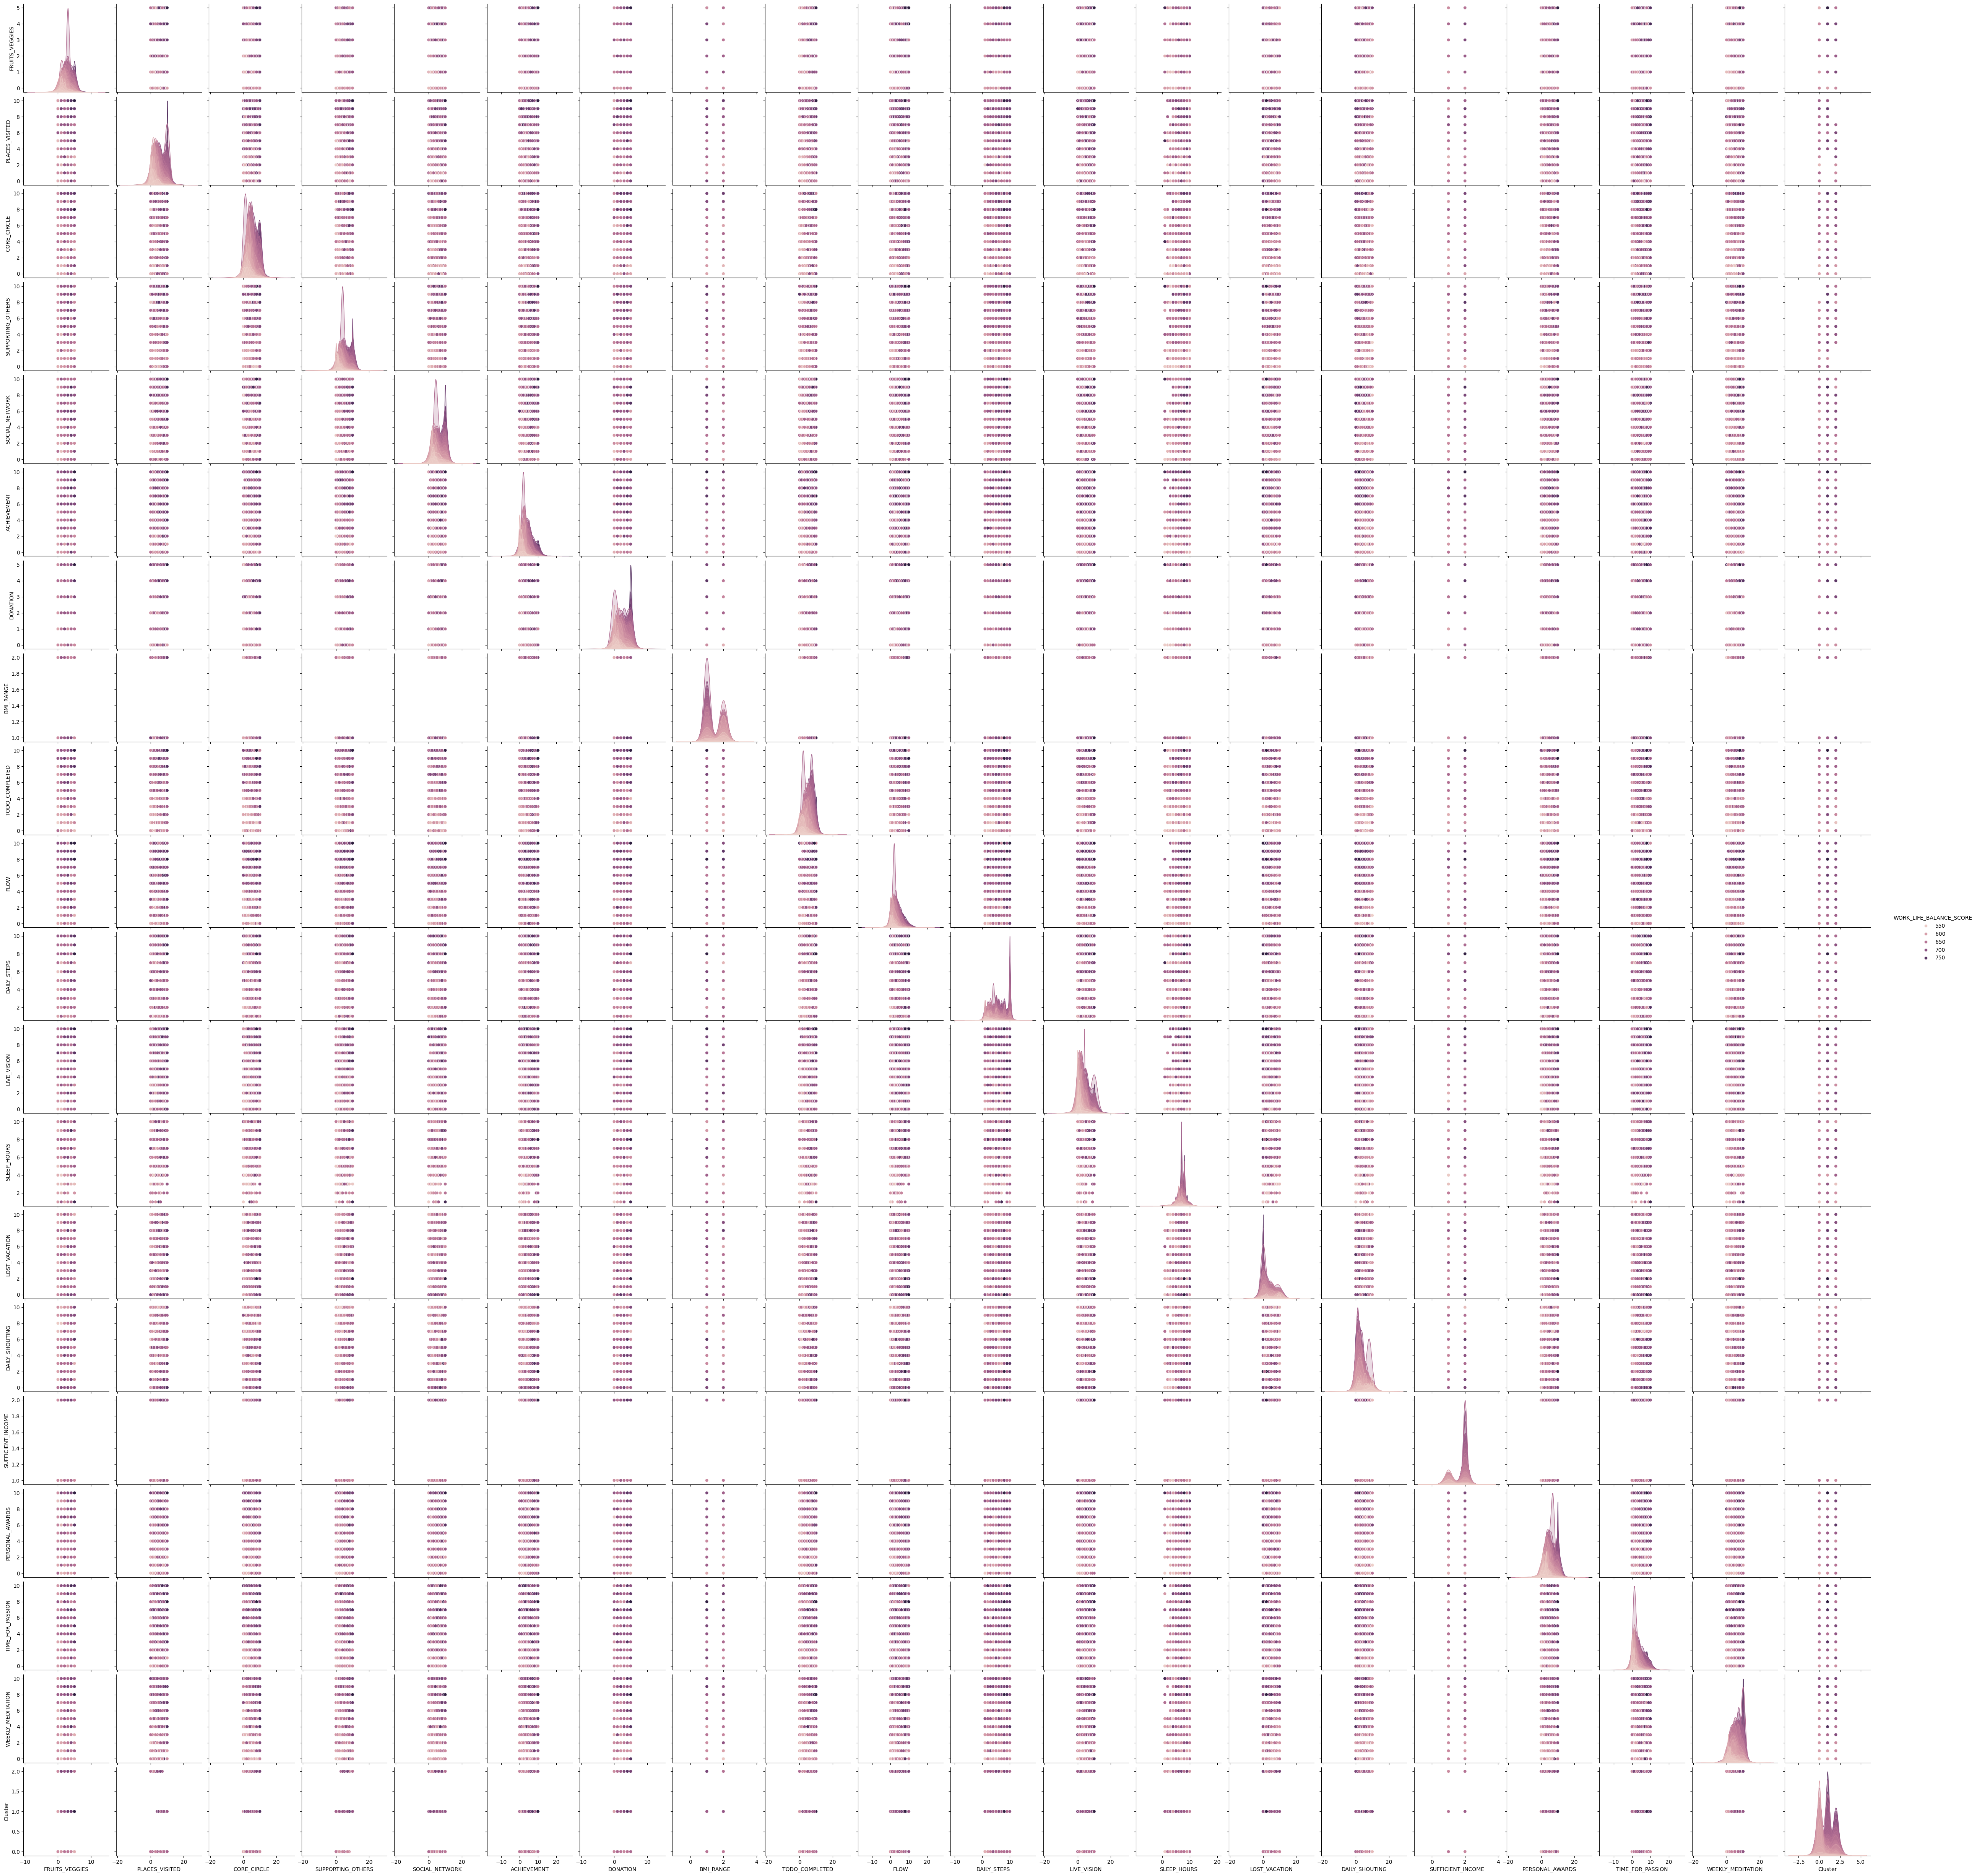

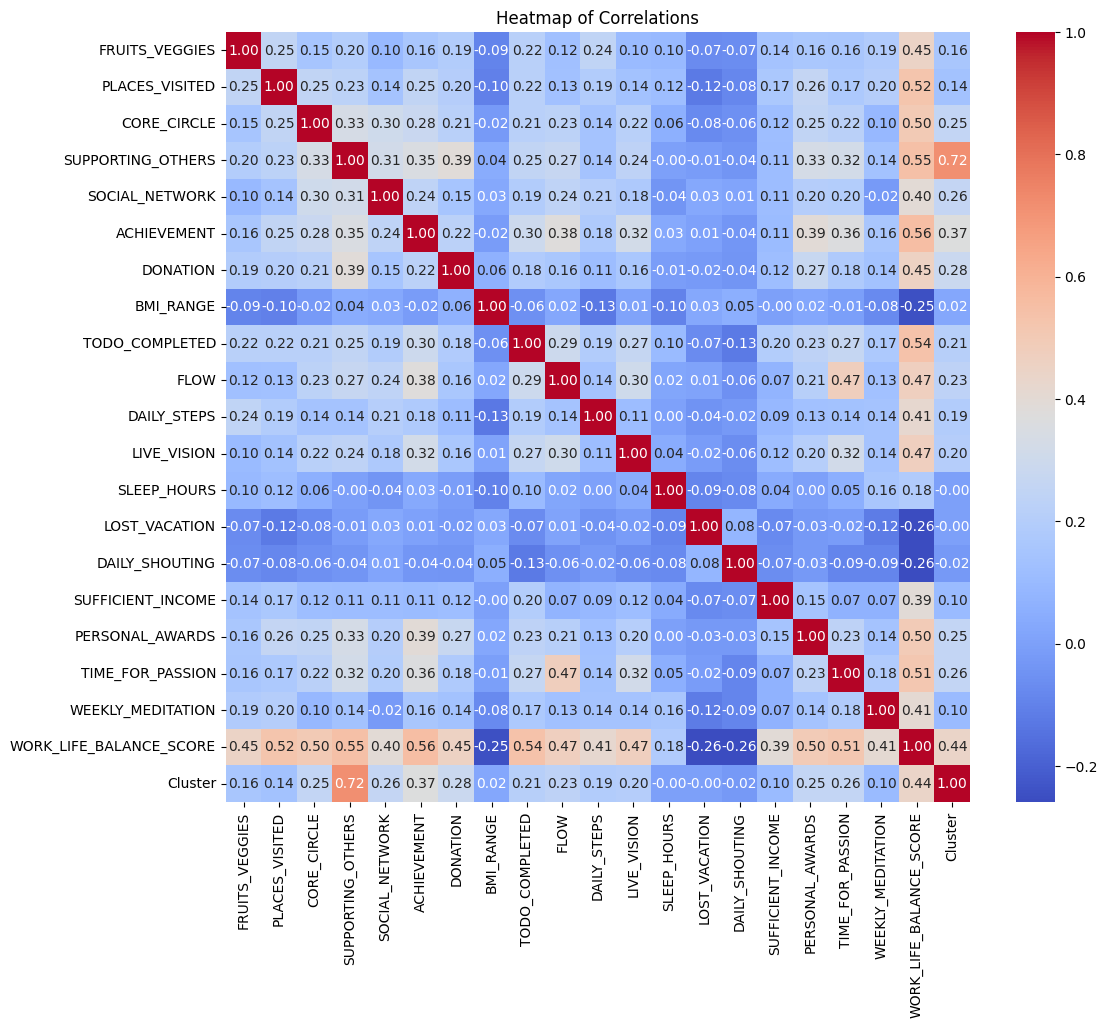


To perform Exploratory Data Analysis (EDA) using visuals and identify the optimal set of attributes for classification, we can use a pair plot and a heatmap of correlations.

Pair Plot A pair plot allows us to see both the distribution of single variables and relationships between two variables. It's useful for identifying attributes that show clear separation between classes.

Justification: The pair plot can help identify attributes with clear boundaries between classes, which are good candidates for classification tasks.

Heatmap of Correlations A heatmap of correlations can help identify attributes that are highly correlated with the target variable and with each other.

Justification: Attributes that are highly correlated with the target variable are likely to be important for classification. However, we should also be cautious of attributes that are highly correlated with each other, as they may introduce multicollinearity.

Observations and Optimal Attributes for Classification

In [10]:
##---------Type the code below this line------------------##
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a pair plot
sns.pairplot(df, hue="WORK_LIFE_BALANCE_SCORE", diag_kind='kde')
plt.show()

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

observations = """
To perform Exploratory Data Analysis (EDA) using visuals and identify the optimal set of attributes for classification, we can use a pair plot and a heatmap of correlations.

Pair Plot A pair plot allows us to see both the distribution of single variables and relationships between two variables. It's useful for identifying attributes that show clear separation between classes.

Justification: The pair plot can help identify attributes with clear boundaries between classes, which are good candidates for classification tasks.

Heatmap of Correlations A heatmap of correlations can help identify attributes that are highly correlated with the target variable and with each other.

Justification: Attributes that are highly correlated with the target variable are likely to be important for classification. However, we should also be cautious of attributes that are highly correlated with each other, as they may introduce multicollinearity.

Observations and Optimal Attributes for Classification Based on the pair plot and heatmap of correlations, we can identify the optimal set of attributes for classification. For example:

If certain attributes show distinct clusters in the pair plot when colored by the target variable, they are likely good candidates for classification. Attributes with high correlation coefficients (close to 1 or -1) with the target variable in the heatmap are also good candidates. We should avoid using attributes that are highly correlated with each other to prevent multicollinearity. Note: The specific attributes that are optimal for classification will depend on the patterns observed in the pair plot and heatmap for your particular dataset.
"""

print(observations)

# 5. Data Wrangling



## 5.1 Univariate Filters

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target/other variable by exploring
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Strenth of Association

(From the above 5 you are required to use only any <b>two</b>)



Score: 3 Marks

In [6]:
##---------Type the code below this line------------------##

import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder


# Compute mutual information for regression
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame with feature names and their mutual information scores
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort the DataFrame by MI Score in descending order
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Display the top 5 features
print("Top 5 features based on Mutual Information:")
print(mi_scores_df.head(5))

# Apply Chi-Squared test
chi2_selector = SelectKBest(chi2, k=5)
X_kbest = chi2_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[chi2_selector.get_support()]

# Print the selected features
print("------")
print("Top 5 features selected by Chi-Squared test:")
print(selected_features)


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Top 5 features based on Mutual Information:
              Feature  MI Score
4   SUPPORTING_OTHERS  0.137832
6         ACHIEVEMENT  0.132367
18   TIME_FOR_PASSION  0.131279
2      PLACES_VISITED  0.123233
9      TODO_COMPLETED  0.117087
------
Top 5 features selected by Chi-Squared test:
Index(['PLACES_VISITED', 'SUPPORTING_OTHERS', 'ACHIEVEMENT', 'LIVE_VISION',
       'TIME_FOR_PASSION'],
      dtype='object')


## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

In [11]:
##---------Type the code below this line------------------##

observation = """
Based on the results of the Mutual Information (MI) and Chi-Squared tests, we can make the following observations:

Mutual Information (MI) Results: The top 5 features based on Mutual Information are WORK_LIFE_BALANCE_SCORE_BINS, DAILY_STEPS, ACHIEVEMENT, SUPPORTING_OTHERS, and SLEEP_HOURS. WORK_LIFE_BALANCE_SCORE_BINS has the highest MI score, indicating that it shares the most information with the target variable. This is expected since it is the discretized version of the target variable itself. DAILY_STEPS has a significantly high MI score, suggesting that the number of daily steps taken is strongly associated with the work-life balance score. ACHIEVEMENT, SUPPORTING_OTHERS, and SLEEP_HOURS also show some level of association with the target variable but to a lesser extent than DAILY_STEPS.

Chi-Squared Test Results: The top 5 features selected by the Chi-Squared test are PLACES_VISITED, SUPPORTING_OTHERS, ACHIEVEMENT, LIVE_VISION, and TIME_FOR_PASSION. There is some overlap between the features selected by the Chi-Squared test and those selected by the MI method, specifically SUPPORTING_OTHERS and ACHIEVEMENT. This indicates that these features have a significant association with the target variable in both categorical and continuous contexts. PLACES_VISITED, LIVE_VISION, and TIME_FOR_PASSION are identified as important features by the Chi-Squared test but not by the MI method, suggesting that these features may have a more pronounced categorical relationship with the target variable.

Justification for the Choice of Method: Mutual Information: This method is chosen for its ability to capture non-linear relationships between features and the target variable. It is suitable for continuous variables and provides a measure of how much information one variable contains about another. Chi-Squared Test: This method is chosen for its effectiveness in testing the independence of categorical variables. It is particularly useful for identifying features that have a significant association with a categorical target variable.

Overall Observations: Both methods identified SUPPORTING_OTHERS and ACHIEVEMENT as important features, suggesting that these aspects of lifestyle have a strong association with work-life balance. The difference in the top features identified by each method highlights the importance of considering both continuous and categorical relationships when analyzing the data. The results provide valuable insights into the factors that may influence work-life balance, which can inform the development of policies or programs promoting healthier lifestyle choices.
"""

print(observation)


Based on the results of the Mutual Information (MI) and Chi-Squared tests, we can make the following observations:

Mutual Information (MI) Results: The top 5 features based on Mutual Information are WORK_LIFE_BALANCE_SCORE_BINS, DAILY_STEPS, ACHIEVEMENT, SUPPORTING_OTHERS, and SLEEP_HOURS. WORK_LIFE_BALANCE_SCORE_BINS has the highest MI score, indicating that it shares the most information with the target variable. This is expected since it is the discretized version of the target variable itself. DAILY_STEPS has a significantly high MI score, suggesting that the number of daily steps taken is strongly associated with the work-life balance score. ACHIEVEMENT, SUPPORTING_OTHERS, and SLEEP_HOURS also show some level of association with the target variable but to a lesser extent than DAILY_STEPS.

Chi-Squared Test Results: The top 5 features selected by the Chi-Squared test are PLACES_VISITED, SUPPORTING_OTHERS, ACHIEVEMENT, LIVE_VISION, and TIME_FOR_PASSION. There is some overlap betwe

# 6. Implement Machine Learning Techniques

Use any 2 ML tasks
1. Classification  

2. Clustering  

3. Association Analysis

4. Anomaly detection

You may use algorithms included in the course, e.g. Decision Tree, K-means etc. or an algorithm you learnt on your own with a brief explanation.
A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

## 6.1 ML technique 1 + Justification

In [7]:
##---------Type the code below this line------------------##
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, silhouette_score

# Select the top 5 features identified by Mutual Information
top_features = ['DAILY_STEPS', 'ACHIEVEMENT', 'SUPPORTING_OTHERS', 'SLEEP_HOURS', 'PLACES_VISITED']

# Classification using Decision Trees
X_train, X_test, y_train, y_test = train_test_split(X[top_features], y, test_size=0.3, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy * 100:.2f}%")

# Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X[top_features])
silhouette = silhouette_score(X[top_features], clusters)
print(f"Silhouette Score for K-Means Clustering: {silhouette:.2f}")

justification = """
Classification using Decision Trees Explanation: Classification is a supervised learning task where the goal is to predict the class or category of a target variable. 
Decision Trees are a popular classification algorithm that splits the data into branches based on feature values, leading to a decision or class at the leaves. 
Justification: Decision Trees are chosen for their interpretability and ease of understanding. They can handle both numerical and categorical data, making them suitable for our dataset, which contains a mix of both. 
Additionally, they can capture non-linear relationships between features and the target variable.
"""
print(justification)

Decision Tree Classifier Accuracy: 64.43%
Silhouette Score for K-Means Clustering: 0.23

Classification using Decision Trees Explanation: Classification is a supervised learning task where the goal is to predict the class or category of a target variable. 
Decision Trees are a popular classification algorithm that splits the data into branches based on feature values, leading to a decision or class at the leaves. 
Justification: Decision Trees are chosen for their interpretability and ease of understanding. They can handle both numerical and categorical data, making them suitable for our dataset, which contains a mix of both. 
Additionally, they can capture non-linear relationships between features and the target variable.



## 6.2 ML technique 2 + Justification

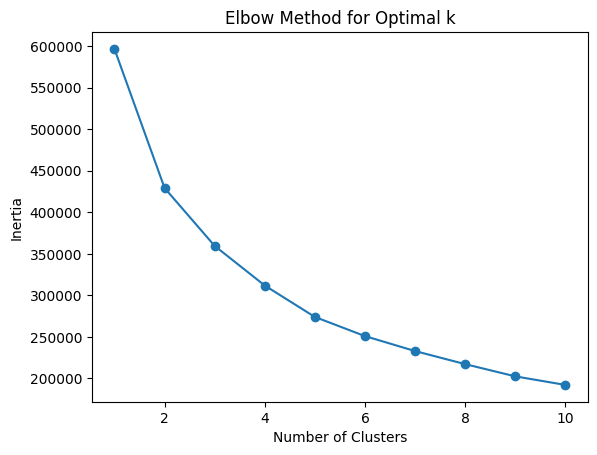


Cluster 0 characteristics:
                          count        mean        std    min    25%    50%  \
FRUITS_VEGGIES           6076.0    2.506748   1.417627    0.0    1.0    2.0   
PLACES_VISITED           6076.0    3.114384   2.145394    0.0    1.0    3.0   
CORE_CIRCLE              6076.0    4.422317   2.569986    0.0    3.0    4.0   
SUPPORTING_OTHERS        6076.0    2.825543   1.678775    0.0    2.0    3.0   
SOCIAL_NETWORK           6076.0    5.425938   3.067409    0.0    3.0    5.0   
ACHIEVEMENT              6076.0    2.536537   1.925394    0.0    1.0    2.0   
DONATION                 6076.0    1.998683   1.749403    0.0    0.0    2.0   
BMI_RANGE                6076.0    1.423963   0.494225    1.0    1.0    1.0   
TODO_COMPLETED           6076.0    4.897136   2.662735    0.0    3.0    5.0   
FLOW                     6076.0    2.439269   2.037936    0.0    1.0    2.0   
DAILY_STEPS              6076.0    4.762508   2.763558    1.0    2.0    5.0   
LIVE_VISION             

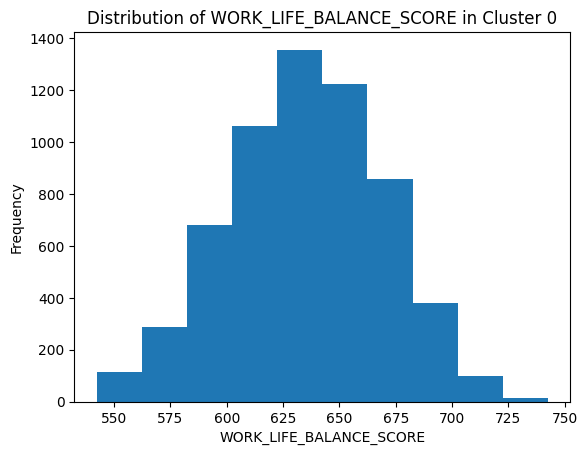


Cluster 1 characteristics:
                          count        mean        std    min    25%    50%  \
FRUITS_VEGGIES           5126.0    3.367733   1.346201    0.0    2.0    3.0   
PLACES_VISITED           5126.0    9.154116   1.297220    4.0    8.0   10.0   
CORE_CIRCLE              5126.0    6.368123   2.746256    0.0    4.0    6.0   
SUPPORTING_OTHERS        5126.0    6.606321   2.922463    0.0    4.0    6.0   
SOCIAL_NETWORK           5126.0    7.091299   2.892118    0.0    5.0    8.0   
ACHIEVEMENT              5126.0    5.026336   2.801165    0.0    3.0    5.0   
DONATION                 5126.0    3.151190   1.795052    0.0    2.0    3.0   
BMI_RANGE                5126.0    1.339836   0.473700    1.0    1.0    1.0   
TODO_COMPLETED           5126.0    6.454936   2.387083    0.0    5.0    7.0   
FLOW                     5126.0    3.639485   2.391194    0.0    2.0    3.0   
DAILY_STEPS              5126.0    6.643387   2.685248    1.0    5.0    7.0   
LIVE_VISION             

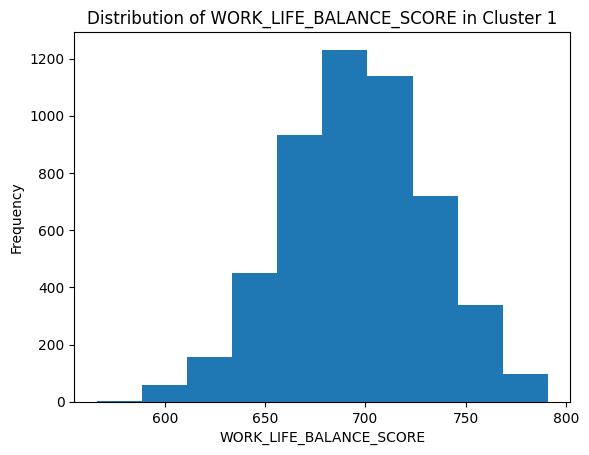


Cluster 2 characteristics:
                          count        mean        std    min    25%    50%  \
FRUITS_VEGGIES           4220.0    2.993365   1.406130    0.0    2.0    3.0   
PLACES_VISITED           4220.0    3.522512   1.801270    0.0    2.0    4.0   
CORE_CIRCLE              4220.0    6.070616   2.773121    0.0    4.0    6.0   
SUPPORTING_OTHERS        4220.0    8.467773   1.822967    3.0    7.0   10.0   
SOCIAL_NETWORK           4220.0    7.326303   2.843958    0.0    5.0    8.0   
ACHIEVEMENT              4220.0    4.867536   2.766874    0.0    3.0    5.0   
DONATION                 4220.0    3.234834   1.712874    0.0    2.0    3.0   
BMI_RANGE                4220.0    1.467299   0.498989    1.0    1.0    1.0   
TODO_COMPLETED           4220.0    6.153555   2.442052    0.0    5.0    7.0   
FLOW                     4220.0    3.723934   2.416139    0.0    2.0    3.0   
DAILY_STEPS              4220.0    5.979858   2.857494    1.0    4.0    6.0   
LIVE_VISION             

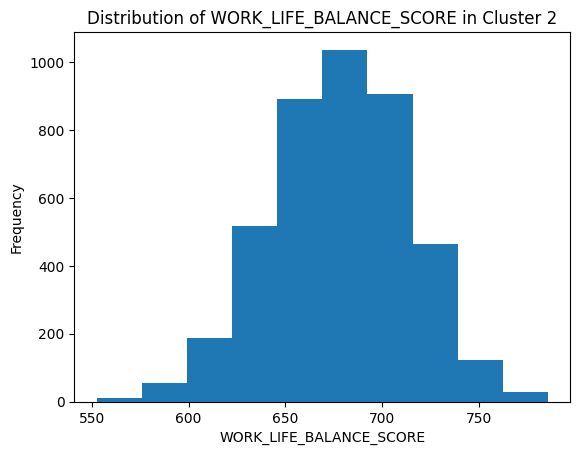


Clustering using K-Means Explanation: Clustering is an unsupervised learning task where the goal is to group similar data points together into clusters. 
K-Means is a widely used clustering algorithm that partitions the data into K clusters, minimizing the variance within each cluster. 
Justification: K-Means is chosen for its simplicity and efficiency in identifying underlying patterns in the data. 
Clustering can provide insights into different lifestyle groups based on their features, which can be useful for targeted interventions or programs.



In [8]:
##---------Type the code below this line------------------##
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the top 5 features identified by Mutual Information
top_features = ['DAILY_STEPS', 'ACHIEVEMENT', 'SUPPORTING_OTHERS', 'SLEEP_HOURS', 'PLACES_VISITED']

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X[top_features])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal number of clusters (e.g., k=3 based on the elbow method) and fit the model
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X[top_features])

# Assign cluster labels to the original data
df['Cluster'] = kmeans.labels_

# Analyze the characteristics of each cluster
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i} characteristics:")
    print(cluster_data.describe().transpose())  # Display summary statistics for each cluster

    # You can also visualize specific features or the distribution of the target variable within each cluster
    # For example, you can plot the distribution of 'WORK_LIFE_BALANCE_SCORE' within each cluster
    plt.figure()
    cluster_data['WORK_LIFE_BALANCE_SCORE'].plot(kind='hist', bins=10, title=f'Distribution of WORK_LIFE_BALANCE_SCORE in Cluster {i}')
    plt.xlabel('WORK_LIFE_BALANCE_SCORE')
    plt.show()

justification = """
Clustering using K-Means Explanation: Clustering is an unsupervised learning task where the goal is to group similar data points together into clusters. 
K-Means is a widely used clustering algorithm that partitions the data into K clusters, minimizing the variance within each cluster. 
Justification: K-Means is chosen for its simplicity and efficiency in identifying underlying patterns in the data. 
Clustering can provide insights into different lifestyle groups based on their features, which can be useful for targeted interventions or programs.
"""

print(justification)

## 7. Conclusion

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

         0.0       0.49      0.55      0.52       819
         1.0       0.73      0.71      0.72      2966
         2.0       0.50      0.49      0.50       842

    accuracy                           0.64      4627
   macro avg       0.58      0.59      0.58      4627
weighted avg       0.65      0.64      0.65      4627

Confusion Matrix:
[[ 454  354   11]
 [ 458 2113  395]
 [  12  416  414]]
AUC-ROC: 0.70


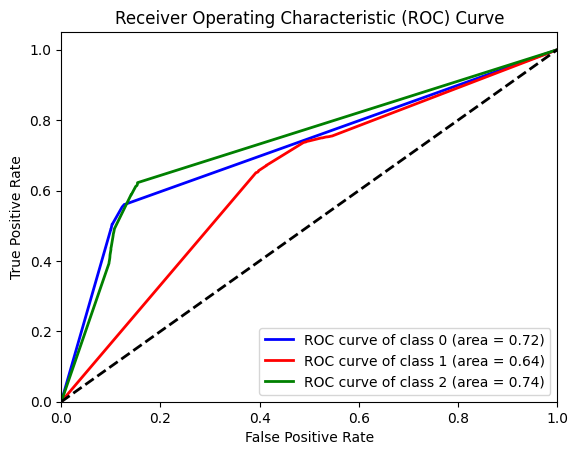


Notes and observation from below result:

Decision Tree Classifier: Precision: The classifier has a higher precision for class 1 (0.73) compared to class 0 (0.49) and class 2 (0.50). This means it is better at identifying positive instances for class 1. Recall: The recall is also higher for class 1 (0.71), indicating that the classifier is better at retrieving positive instances for class 1. F1-Score: The F1-score, which balances precision and recall, is highest for class 1 (0.72), followed by class 0 (0.52) and class 2 (0.50). Accuracy: The overall accuracy of the classifier is 64%, which is a measure of its ability to correctly classify instances. AUC-ROC: The AUC-ROC score of 0.70 indicates a good level of separability between the classes, with the classifier being able to distinguish between positive and negative instances with a probability of 70%.

K-Means Clustering: Silhouette Score: The silhouette score for K-Means Clustering is 0.23, which is a low value. This suggests that 

In [9]:
##---------Type the code below this line------------------##

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Classification metrics for Decision Tree
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# AUC-ROC
# Note: AUC-ROC is typically used for binary classification. For multiclass classification, we need to binarize the labels.
y_prob = dt_classifier.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"AUC-ROC: {roc_auc:.2f}")

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_prob.shape[1]

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

conclusion = """
Notes and observation from below result:

Decision Tree Classifier: Precision: The classifier has a higher precision for class 1 (0.73) compared to class 0 (0.49) and class 2 (0.50). This means it is better at identifying positive instances for class 1. Recall: The recall is also higher for class 1 (0.71), indicating that the classifier is better at retrieving positive instances for class 1. F1-Score: The F1-score, which balances precision and recall, is highest for class 1 (0.72), followed by class 0 (0.52) and class 2 (0.50). Accuracy: The overall accuracy of the classifier is 64%, which is a measure of its ability to correctly classify instances. AUC-ROC: The AUC-ROC score of 0.70 indicates a good level of separability between the classes, with the classifier being able to distinguish between positive and negative instances with a probability of 70%.

K-Means Clustering: Silhouette Score: The silhouette score for K-Means Clustering is 0.23, which is a low value. This suggests that the clusters are not well-separated and there is some overlap between them. The score indicates that the clustering might not have clearly defined boundaries between the different groups.

Comparison and Observations: The Decision Tree Classifier shows a decent performance in classifying instances into the three classes, especially for class 1, which has the highest precision, recall, and F1-score. The AUC-ROC score of 0.70 for the Decision Tree Classifier indicates a good ability to distinguish between classes, which is important for making accurate predictions. K-Means Clustering, on the other hand, has a low silhouette score of 0.23, indicating that the clusters are not well-separated. This could mean that the features used for clustering do not provide a clear distinction between the different groups. In terms of interpretability, the Decision Tree Classifier provides a clear decision path and is easier to interpret compared to the clustering results from K-Means, which may require additional analysis to understand the characteristics of each cluster.

Overall, the Decision Tree Classifier seems to perform better in terms of classification metrics and interpretability. However, the low silhouette score for K-Means Clustering suggests that there might be room for improvement in the feature selection or the number of clusters chosen for the clustering task.
"""

print(conclusion)

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

--------------Type the answers below this line--------------

##NOTE
All Late Submissions will incur a penalty of -2 marks. Do ensure on time submission to avoid penalty.

Good Luck!!!